## Driver's Fault Prediction

Supervised Machine Learning Logistic regression

STEP 1: Import Libraries

In [ ]:
# Import Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

STEP 2: Read data description and Load the Data

In [ ]:
car_crash_df=pd.read_csv("Crash_Reporting_-_Drivers_Data.csv")

In [ ]:
car_crash_df.head(5)

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,DD5620004G,190046109,Rockville Police Departme,Property Damage Crash,09/26/2019 07:20:00 AM,NaN,NaN,NaN,NaN,PARKING LOT,...,15,No,No,2017,THOMAS,BUS,NO MISUSE,39.103518,-77.157669,"(39.10351817, -77.15766933)"
1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,06/18/2020 02:00:00 AM,County,DAIRYMAID DR,County,METZ DR,NaN,...,35,No,No,2020,UNK,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)"
2,MCP2651004P,210035267,Montgomery County Police,Property Damage Crash,09-08-2021 12:30,NaN,NaN,NaN,NaN,PARKING LOT OF 10109 COLESVILLE RD,...,0,No,No,2010,TOYOTA,SUV,UNKNOWN,39.020303,-77.011436,"(39.02030267, -77.01143583)"
3,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,04/19/2020 03:39:00 PM,County,RUSSETT RD,County,ARCTIC AVE,NaN,...,25,No,No,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)"
4,MCP2641001J,200016526,Montgomery County Police,Injury Crash,04/20/2020 09:15:00 AM,County,ARCHDALE RD,County,GUNNERS BRANCH RD,NaN,...,25,No,No,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)"


In [ ]:
print('There are {} rows and {} columns in our dataset'.format(car_crash_df.shape[0],car_crash_df.shape[1]))

There are 157840 rows and 43 columns in our dataset


In [ ]:
car_crash_df.describe()

,Speed Limit,Vehicle Year,Latitude,Longitude
count,157840.000000,157840.000000,157840.000000,157840.000000
mean,32.632444,1966.609782,39.082917,-77.112194
std,11.062877,339.075184,0.072129,0.098758
min,0.000000,0.000000,37.720000,-79.486000
25%,25.000000,2005.000000,39.024185,-77.188762
50%,35.000000,2011.000000,39.074793,-77.105150
75%,40.000000,2015.000000,39.139104,-77.039530
max,70.000000,9999.000000,39.990414,-75.527708


In [ ]:
car_crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157840 entries, 0 to 157839
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   157840 non-null  object 
 1   Local Case Number               157840 non-null  object 
 2   Agency Name                     157840 non-null  object 
 3   ACRS Report Type                157840 non-null  object 
 4   Crash Date/Time                 157840 non-null  object 
 5   Route Type                      142357 non-null  object 
 6   Road Name                       143215 non-null  object 
 7   Cross-Street Type               142333 non-null  object 
 8   Cross-Street Name               143207 non-null  object 
 9   Off-Road Description            14623 non-null   object 
 10  Municipality                    17541 non-null   object 
 11  Related Non-Motorist            4969 non-null    object 
 12  Collision Type  

STEP 3: Clean the data

In [ ]:
car_crash_df.isnull().sum()

Report Number                          0
Local Case Number                      0
Agency Name                            0
ACRS Report Type                       0
Crash Date/Time                        0
Route Type                         15483
Road Name                          14625
Cross-Street Type                  15507
Cross-Street Name                  14633
Off-Road Description              143217
Municipality                      140299
Related Non-Motorist              152871
Collision Type                       527
Weather                            12382
Surface Condition                  18523
Light                               1309
Traffic Control                    23748
Driver Substance Abuse             28686
Non-Motorist Substance Abuse      153901
Person ID                              0
Driver At Fault                        0
Injury Severity                        0
Circumstance                      128674
Driver Distracted By                   0
Drivers License 

In [ ]:
#droping columns
dropped_df=car_crash_df.drop(['Report Number','Off-Road Description','Municipality','Related Non-Motorist','Non-Motorist Substance Abuse','Circumstance'],axis=1)
dropped_df

,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Collision Type,Weather,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,190046109,Rockville Police Departme,Property Damage Crash,09/26/2019 07:20:00 AM,NaN,NaN,NaN,NaN,SINGLE VEHICLE,CLEAR,...,15,No,No,2017,THOMAS,BUS,NO MISUSE,39.103518,-77.157669,"(39.10351817, -77.15766933)"
1,200023865,Montgomery County Police,Property Damage Crash,06/18/2020 02:00:00 AM,County,DAIRYMAID DR,County,METZ DR,OTHER,CLOUDY,...,35,No,No,2020,UNK,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)"
2,210035267,Montgomery County Police,Property Damage Crash,09-08-2021 12:30,NaN,NaN,NaN,NaN,OTHER,CLEAR,...,0,No,No,2010,TOYOTA,SUV,UNKNOWN,39.020303,-77.011436,"(39.02030267, -77.01143583)"
3,200016465,Montgomery County Police,Property Damage Crash,04/19/2020 03:39:00 PM,County,RUSSETT RD,County,ARCTIC AVE,OTHER,CLEAR,...,25,No,No,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)"
4,200016526,Montgomery County Police,Injury Crash,04/20/2020 09:15:00 AM,County,ARCHDALE RD,County,GUNNERS BRANCH RD,OTHER,CLOUDY,...,25,No,No,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157835,230016438,Montgomery County Police,Injury Crash,04-06-2023 16:24,Maryland (State),CLOPPER RD,County,CINNAMON DR,ANGLE MEETS RIGHT TURN,CLEAR,...,30,No,No,2008,TOYT,CAMRY,NO MISUSE,39.156162,-77.264571,"(39.15616222, -77.26457057)"
157836,230016731,Montgomery County Police,Injury Crash,04-08-2023 05:10,County,SHADY GROVE RD,Maryland (State),MUNCASTER MILL RD,STRAIGHT MOVEMENT ANGLE,CLEAR,...,40,No,No,2019,HONDA,CIVIC,NO MISUSE,39.148709,-77.147145,"(39.14870889, -77.14714516)"
157837,230016769,Montgomery County Police,Property Damage Crash,04-08-2023 11:50,Maryland (State),GEORGIA AVE,Maryland (State),OLNEY SANDY SPRING RD,SAME DIR REAR END,CLEAR,...,30,No,No,2020,CHEVROLET,EQUINOX,NO MISUSE,39.152575,-77.066550,"(39.152575, -77.06655)"
157838,230017164,Montgomery County Police,Injury Crash,04-10-2023 22:10,Maryland (State),GOLDSBORO RD,Maryland (State),MASSACHUSETTS AVE,HEAD ON,CLEAR,...,25,No,No,2017,HYUNDAI,SONATA,NaN,38.970008,-77.131061,"(38.97000767, -77.131061)"


In [ ]:
dropped_df.isnull().sum()

Local Case Number                     0
Agency Name                           0
ACRS Report Type                      0
Crash Date/Time                       0
Route Type                        15483
Road Name                         14625
Cross-Street Type                 15507
Cross-Street Name                 14633
Collision Type                      527
Weather                           12382
Surface Condition                 18523
Light                              1309
Traffic Control                   23748
Driver Substance Abuse            28686
Person ID                             0
Driver At Fault                       0
Injury Severity                       0
Driver Distracted By                  0
Drivers License State              8765
Vehicle ID                            0
Vehicle Damage Extent               279
Vehicle First Impact Location       156
Vehicle Second Impact Location      256
Vehicle Body Type                  2418
Vehicle Movement                    334


In [ ]:
dropna_df=dropped_df.dropna()
dropna_df

,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Collision Type,Weather,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
3,200016465,Montgomery County Police,Property Damage Crash,04/19/2020 03:39:00 PM,County,RUSSETT RD,County,ARCTIC AVE,OTHER,CLEAR,...,25,No,No,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)"
4,200016526,Montgomery County Police,Injury Crash,04/20/2020 09:15:00 AM,County,ARCHDALE RD,County,GUNNERS BRANCH RD,OTHER,CLOUDY,...,25,No,No,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)"
6,200016622,Rockville Police Departme,Property Damage Crash,04/21/2020 06:45:00 AM,Municipality,WOOTTON PKWY,Municipality,TOWER OAKS BLVD,SAME DIR REAR END,CLEAR,...,40,No,No,2018,TOYT,4S,NO MISUSE,39.066925,-77.154085,"(39.066925, -77.154085)"
7,200013792,Montgomery County Police,Property Damage Crash,03/24/2020 07:13:00 AM,County,CASHELL RD,County,MUSIC GROVE CT,SINGLE VEHICLE,CLOUDY,...,35,No,No,2017,FORD,EXPLORER,NO MISUSE,39.131327,-77.083237,"(39.13132667, -77.08323667)"
13,200016382,Montgomery County Police,Injury Crash,04/18/2020 03:58:00 PM,Maryland (State),OLNEY LAYTONSVILLE RD,County,GOLF ESTATES DR,SAME DIRECTION SIDESWIPE,CLEAR,...,30,No,No,1998,MERZ,4S,NO MISUSE,39.201237,-77.136003,"(39.20123667, -77.13600333)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157832,230015879,Montgomery County Police,Injury Crash,04-03-2023 10:00,County,CENTERHILL ST,Maryland (State),VEIRS MILL RD,STRAIGHT MOVEMENT ANGLE,CLEAR,...,40,No,No,2022,VOLKSWAGEN,ID.4,NO MISUSE,39.050573,-77.072500,"(39.05057264, -77.07250048)"
157834,230016505,Rockville Police Departme,Injury Crash,04-06-2023 18:19,Maryland (State),W MONTGOMERY AVE,Municipality,THOMAS ST,SAME DIR REAR END,RAINING,...,30,No,No,2010,TOYOTA,4S,NO MISUSE,39.084660,-77.161154,"(39.08465969, -77.16115427)"
157835,230016438,Montgomery County Police,Injury Crash,04-06-2023 16:24,Maryland (State),CLOPPER RD,County,CINNAMON DR,ANGLE MEETS RIGHT TURN,CLEAR,...,30,No,No,2008,TOYT,CAMRY,NO MISUSE,39.156162,-77.264571,"(39.15616222, -77.26457057)"
157836,230016731,Montgomery County Police,Injury Crash,04-08-2023 05:10,County,SHADY GROVE RD,Maryland (State),MUNCASTER MILL RD,STRAIGHT MOVEMENT ANGLE,CLEAR,...,40,No,No,2019,HONDA,CIVIC,NO MISUSE,39.148709,-77.147145,"(39.14870889, -77.14714516)"


STEP 4: Performing the Exploratory Data Analysis (EDA)

In [ ]:
dropna_df.shape

(77227, 37)

In [ ]:
dropna_df.isnull().sum()

Local Case Number                 0
Agency Name                       0
ACRS Report Type                  0
Crash Date/Time                   0
Route Type                        0
Road Name                         0
Cross-Street Type                 0
Cross-Street Name                 0
Collision Type                    0
Weather                           0
Surface Condition                 0
Light                             0
Traffic Control                   0
Driver Substance Abuse            0
Person ID                         0
Driver At Fault                   0
Injury Severity                   0
Driver Distracted By              0
Drivers License State             0
Vehicle ID                        0
Vehicle Damage Extent             0
Vehicle First Impact Location     0
Vehicle Second Impact Location    0
Vehicle Body Type                 0
Vehicle Movement                  0
Vehicle Continuing Dir            0
Vehicle Going Dir                 0
Speed Limit                 

In [ ]:
print("Number of different type of report when filed after car crash:")
len(dropna_df['ACRS Report Type'].unique())

Number of different type of report when filed after car crash:


3

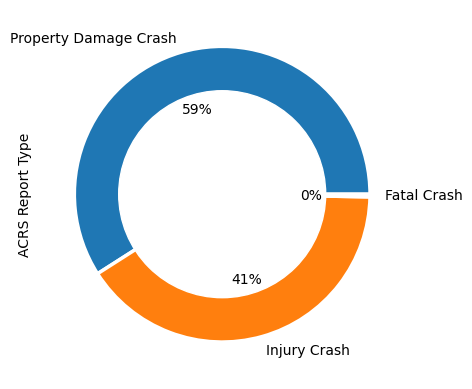

In [ ]:
dropna_df['ACRS Report Type'].value_counts().plot(kind='pie',autopct='%0.0f%%',startangle=1800, wedgeprops = { 'linewidth' : 2.5, 'edgecolor' : 'white' })
my_circle=plt.Circle( (0,0), 0.70, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
print("Number of different type of collision when filed after car crash:")
len(dropna_df['ACRS Report Type'].unique())

Number of different type of collision when filed after car crash:


3

<Axes: >

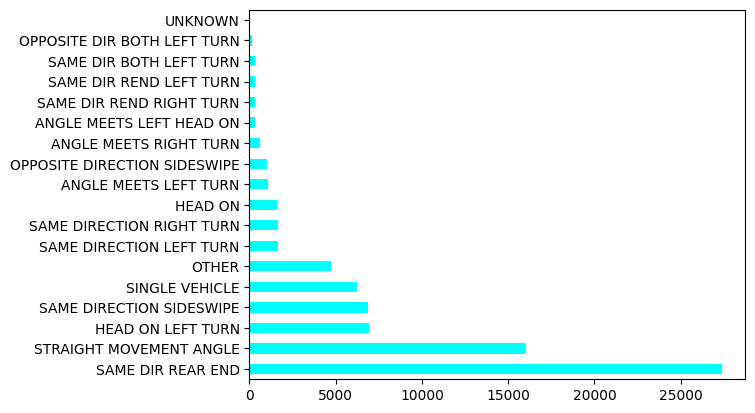

In [ ]:
dropna_df['Collision Type'].value_counts().plot(kind='barh',color="cyan")


In [ ]:
print("Different Weather conditions:")
len(dropna_df['Weather'].unique())

Different Weather conditions:


12

<Axes: >

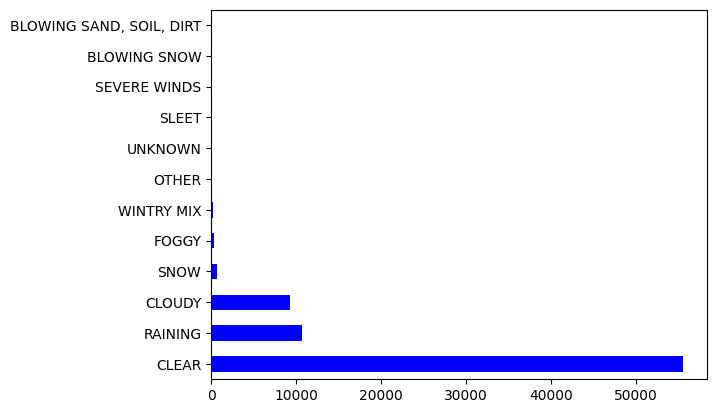

In [ ]:
dropna_df['Weather'].value_counts().plot(kind='barh',color="blue")

In [ ]:
print("Different Surface conditions:")
len(dropna_df['Surface Condition'].unique())

Different Surface conditions:


11

<Axes: >

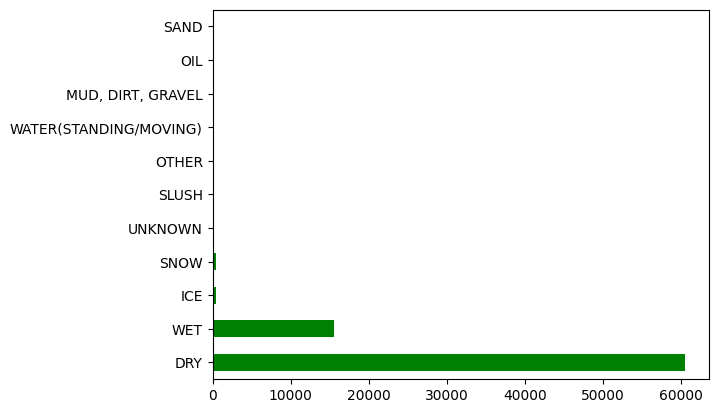

In [ ]:
dropna_df['Surface Condition'].value_counts().plot(kind='barh',color="green")

In [ ]:
print("Different Light conditions:")
len(dropna_df['Light'].unique())

Different Light conditions:


8

<Axes: >

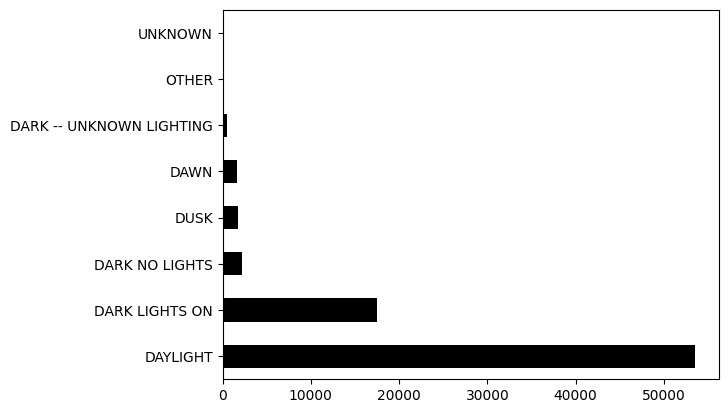

In [ ]:
dropna_df['Light'].value_counts().plot(kind='barh',color="black")

In [ ]:
print("Driver Substance Abuse while he was driving:")
len(dropna_df['Driver Substance Abuse'].unique())

Driver Substance Abuse while he was driving:


11

<Axes: >

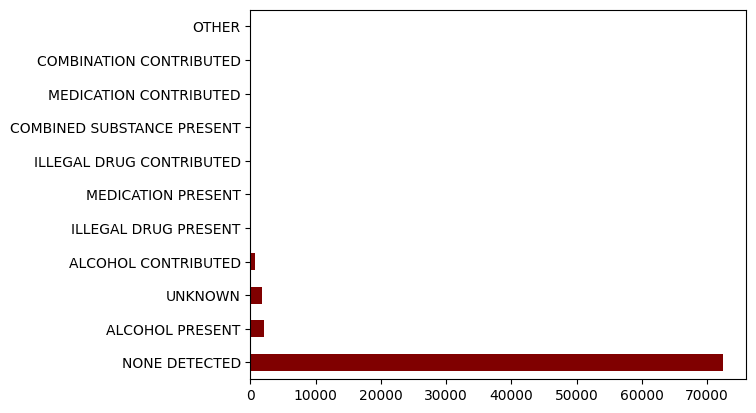

In [ ]:
dropna_df['Driver Substance Abuse'].value_counts().plot(kind='barh',color="maroon")

In [ ]:
print("Different Injury Severity conditions:")
len(dropna_df['Injury Severity'].unique())

Different Injury Severity conditions:


5

<Axes: >

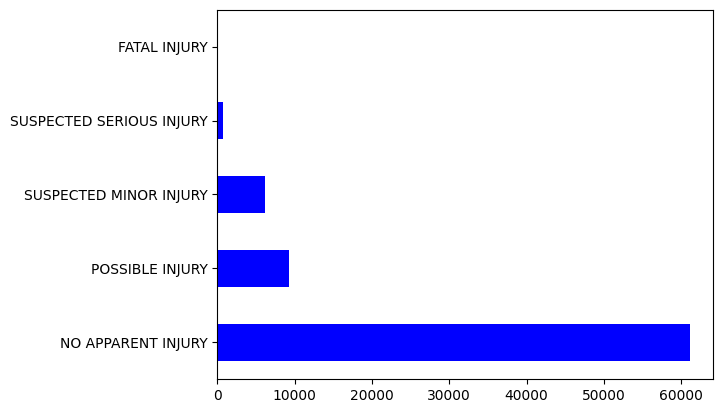

In [ ]:
dropna_df['Injury Severity'].value_counts().plot(kind='barh',color="blue")

In [ ]:
print("Vehicle Body Type:")
len(dropna_df['Vehicle Body Type'].unique())

Vehicle Body Type:


30

<Axes: >

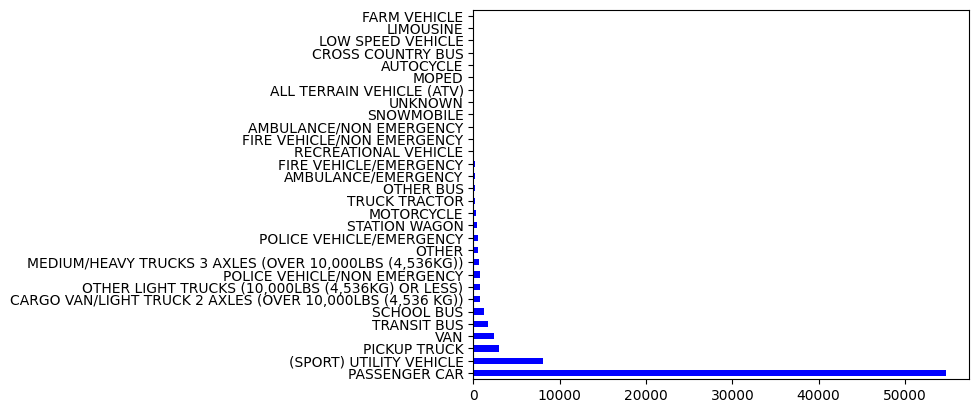

In [ ]:
dropna_df['Vehicle Body Type'].value_counts().plot(kind='barh',color="blue")

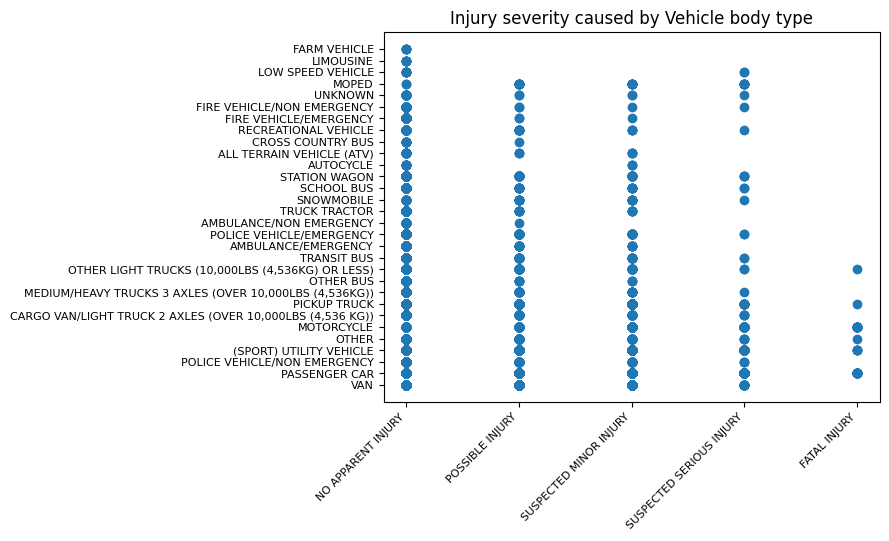

In [ ]:
plt.scatter(dropna_df['Injury Severity'],dropna_df['Vehicle Body Type'])
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.title("Injury severity caused by Vehicle body type")
plt.show()

<Axes: >

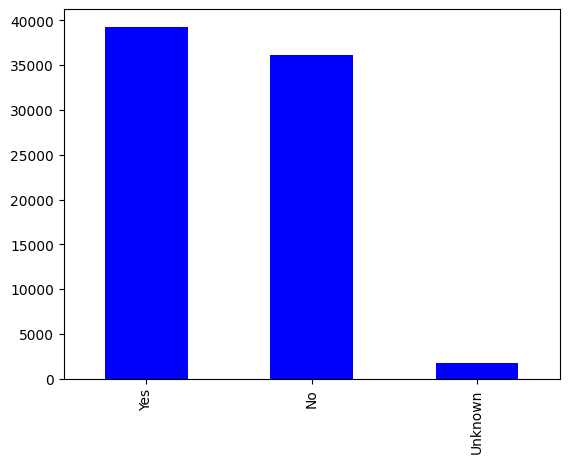

In [ ]:
dropna_df['Driver At Fault'].value_counts().plot(kind='bar',color="blue")

STEP 5: Correlation with Heatmaps, and pairplots 

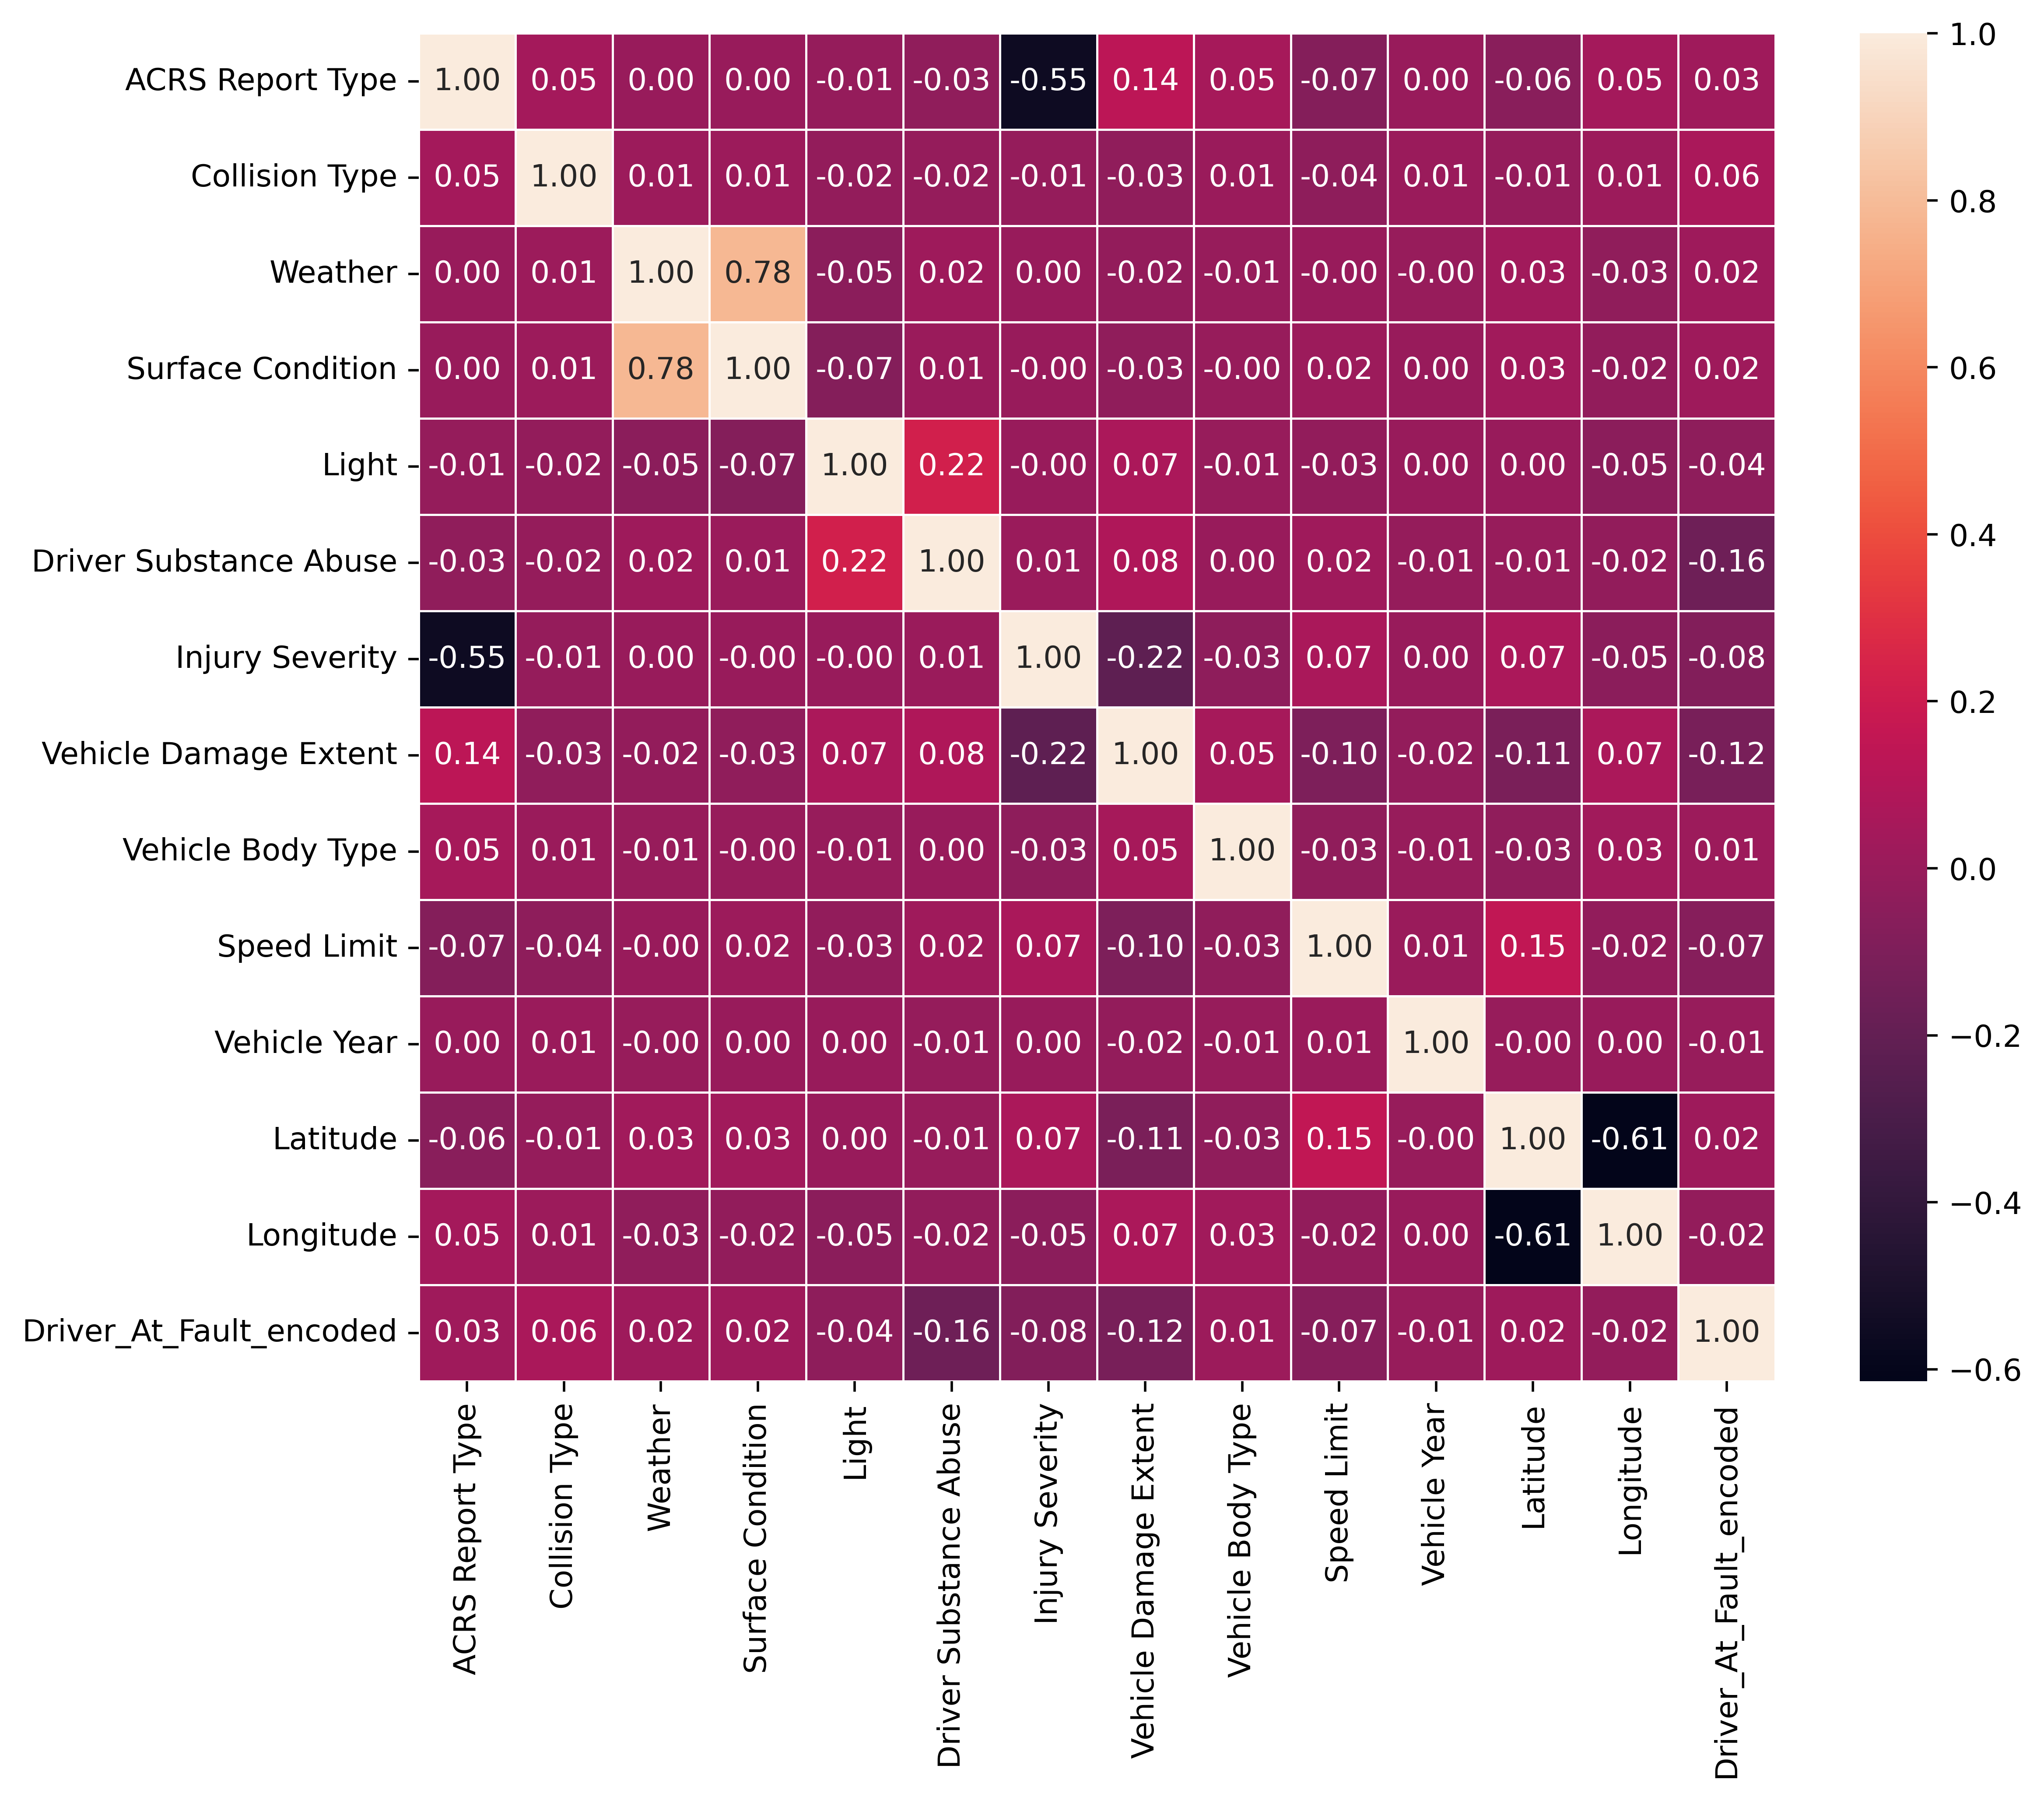

In [ ]:
corr=dropna_df.corr()
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=0.5)
plt.show()

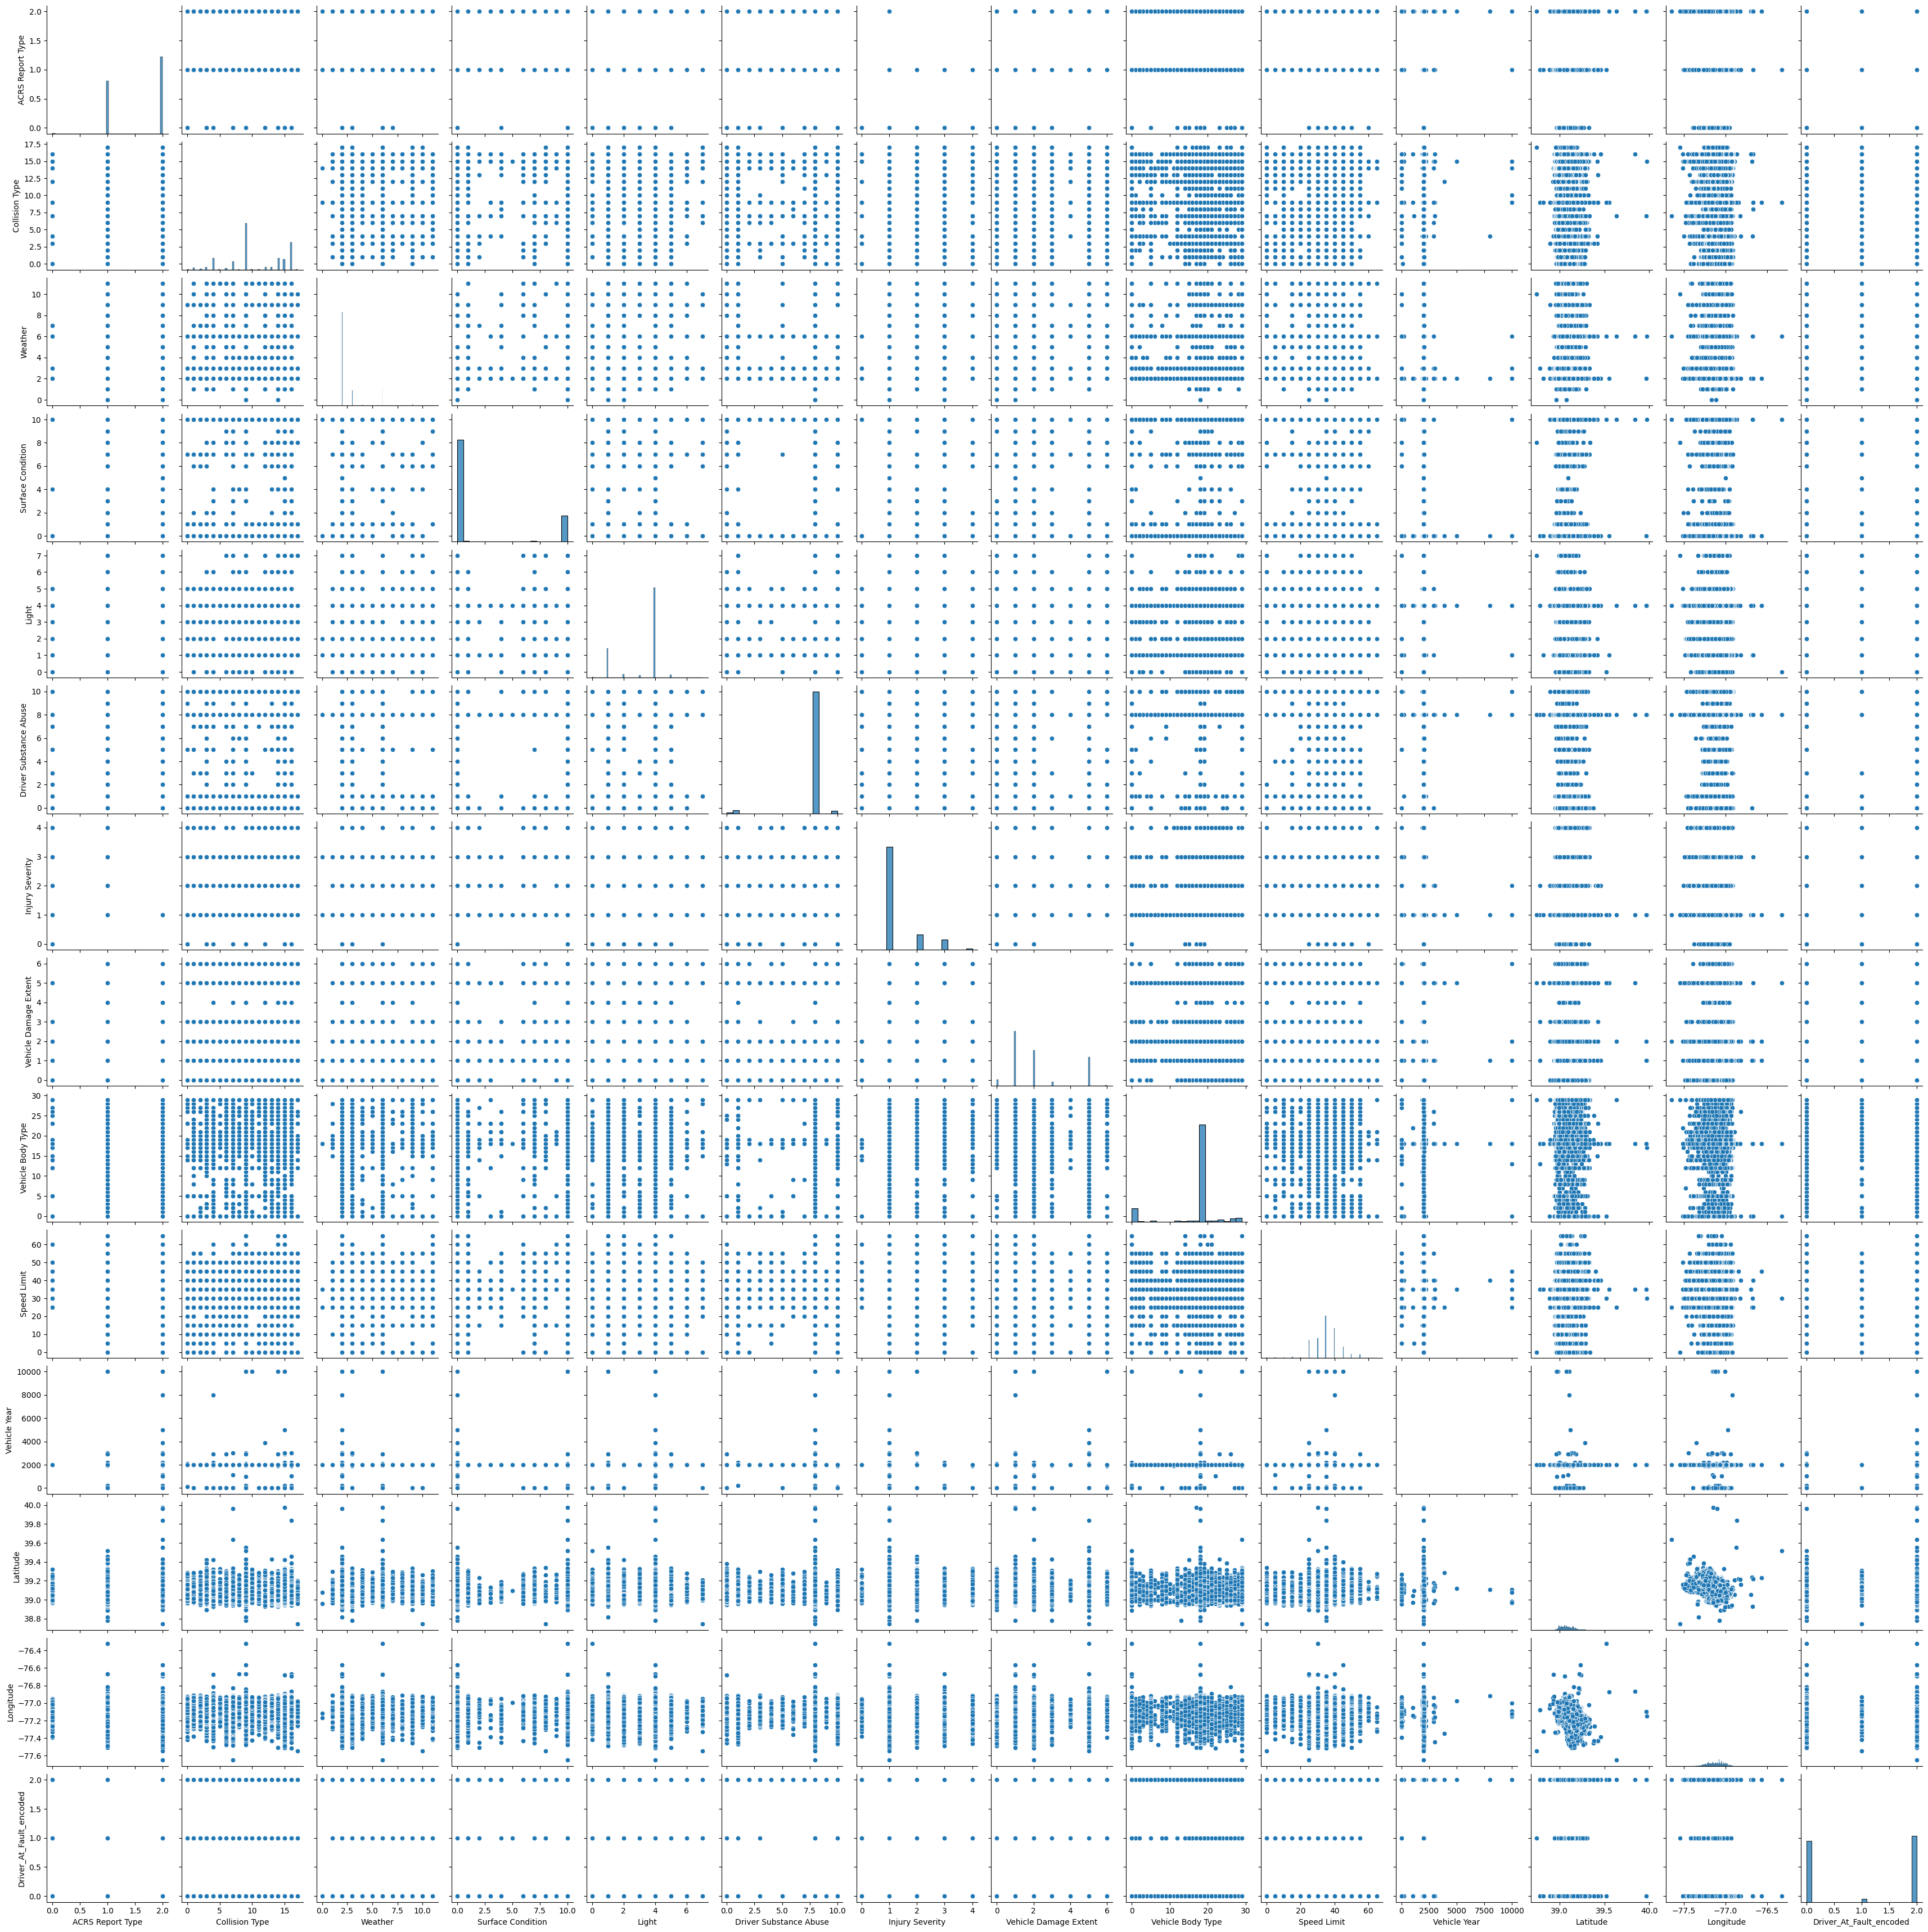

In [ ]:
sns.pairplot(dropna_df)

Using LabelEncoder for categories 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Variables=['ACRS Report Type','Collision Type','Weather','Surface Condition','Light','Driver Substance Abuse','Injury Severity','Vehicle Damage Extent','Vehicle Body Type','Driverless Vehicle','Parked Vehicle']
dropna_df[Variables]=dropna_df[Variables].apply(le.fit_transform)
dropna_df[Variables]

,ACRS Report Type,Collision Type,Weather,Surface Condition,Light,Driver Substance Abuse,Injury Severity,Vehicle Damage Extent,Vehicle Body Type,Driverless Vehicle,Parked Vehicle
3,2,7,2,0,4,1,1,1,29,0,0
4,1,7,3,0,4,8,2,1,18,0,0
6,2,9,2,0,3,8,1,0,18,0,0
7,2,15,3,0,4,8,1,2,21,0,0
13,1,14,2,0,4,8,1,1,18,0,0
...,...,...,...,...,...,...,...,...,...,...,...
157832,1,16,2,0,4,8,3,1,0,0,0
157834,1,9,6,10,4,8,1,1,18,0,0
157835,1,2,2,0,4,8,1,1,18,0,0
157836,1,16,2,0,1,8,3,0,18,0,0


In [ ]:
dropna_df['Driver_At_Fault_encoded']=le.fit_transform(dropna_df['Driver At Fault'])
dropna_df

,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Collision Type,Weather,...,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location,Driver_At_Fault_encoded
3,200016465,Montgomery County Police,2,04/19/2020 03:39:00 PM,County,RUSSETT RD,County,ARCTIC AVE,7,2,...,0,0,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)",2
4,200016526,Montgomery County Police,1,04/20/2020 09:15:00 AM,County,ARCHDALE RD,County,GUNNERS BRANCH RD,7,3,...,0,0,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)",2
6,200016622,Rockville Police Departme,2,04/21/2020 06:45:00 AM,Municipality,WOOTTON PKWY,Municipality,TOWER OAKS BLVD,9,2,...,0,0,2018,TOYT,4S,NO MISUSE,39.066925,-77.154085,"(39.066925, -77.154085)",0
7,200013792,Montgomery County Police,2,03/24/2020 07:13:00 AM,County,CASHELL RD,County,MUSIC GROVE CT,15,3,...,0,0,2017,FORD,EXPLORER,NO MISUSE,39.131327,-77.083237,"(39.13132667, -77.08323667)",0
13,200016382,Montgomery County Police,1,04/18/2020 03:58:00 PM,Maryland (State),OLNEY LAYTONSVILLE RD,County,GOLF ESTATES DR,14,2,...,0,0,1998,MERZ,4S,NO MISUSE,39.201237,-77.136003,"(39.20123667, -77.13600333)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157832,230015879,Montgomery County Police,1,04-03-2023 10:00,County,CENTERHILL ST,Maryland (State),VEIRS MILL RD,16,2,...,0,0,2022,VOLKSWAGEN,ID.4,NO MISUSE,39.050573,-77.072500,"(39.05057264, -77.07250048)",0
157834,230016505,Rockville Police Departme,1,04-06-2023 18:19,Maryland (State),W MONTGOMERY AVE,Municipality,THOMAS ST,9,6,...,0,0,2010,TOYOTA,4S,NO MISUSE,39.084660,-77.161154,"(39.08465969, -77.16115427)",0
157835,230016438,Montgomery County Police,1,04-06-2023 16:24,Maryland (State),CLOPPER RD,County,CINNAMON DR,2,2,...,0,0,2008,TOYT,CAMRY,NO MISUSE,39.156162,-77.264571,"(39.15616222, -77.26457057)",2
157836,230016731,Montgomery County Police,1,04-08-2023 05:10,County,SHADY GROVE RD,Maryland (State),MUNCASTER MILL RD,16,2,...,0,0,2019,HONDA,CIVIC,NO MISUSE,39.148709,-77.147145,"(39.14870889, -77.14714516)",2


STEP 6: Split into Input/Output Array into Training/TestingDatasets
Split the dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
independent_Var= ['ACRS Report Type','Collision Type','Weather','Surface Condition','Light','Driver Substance Abuse','Injury Severity','Speed Limit','Vehicle Damage Extent','Vehicle Body Type']
X=dropna_df[independent_Var]
Y=dropna_df['Driver_At_Fault_encoded']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=43)

STEP 7: Build and Train the Model

In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
model.classes_

array([0, 1, 2])

In [ ]:
le.inverse_transform([0,1,2])

array(['No', 'Unknown', 'Yes'], dtype=object)

In [ ]:
predicted=model.predict(X_test)
report=classification_report(Y_test,predicted)
print("Classification Report: ","\n","\n",report)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.57      0.52      0.54      7299
           1       0.00      0.00      0.00       360
           2       0.58      0.66      0.62      7787

    accuracy                           0.58     15446
   macro avg       0.38      0.39      0.39     15446
weighted avg       0.56      0.58      0.57     15446



STEP 8: Score the Accuracy of the Model

In [ ]:
#score the accuracy level
result=model.score(X_test,Y_test)
#print out the results
print(("Accuracy: %.3f%%")%(result*100.0))

Accuracy: 57.620%


In [ ]:
#preprocessing the model
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
LR.fit(X_train_Scaled,Y_train)
y_pred_Scaled = LR.predict(X_test)

In [ ]:
Accuracy_scaled= model_Scaled.score(X_test_Scaled,Y_test)
print(("Accuracy: %.3f%%")%(Accuracy_scaled*100.0))

Accuracy: 57.672%


In [ ]:
#performing gridsearchcv for the model
from sklearn.model_selection import GridSearchCV

# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [ ]:
 Lr_G = GridSearchCV(LR,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

In [ ]:
Lr_G.fit(X_train_Scaled,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
print("Tuned Hyperparameters :", Lr_G.best_params_)
print("Accuracy :",Lr_G.best_score_*100.0)

Tuned Hyperparameters : {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 57.39628885335206


Train & Score Model 2 Using K-Fold Cross ValidationData Split
Specify the repeatedKfold 

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
#crossvalidation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(LR, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
from numpy import mean
from numpy import std
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.572 (0.007)


Step 9: Prediction

In [ ]:
model.predict([[2,7,2,0,4,1,1,1,29,0]])

array([0])

Predicted that the driver is not at fault

In [ ]:
LR.predict([[2,15,6,9,2,8,4,2,25,1]])

array([1])

Predicted that the driver at fault is unknown

In [ ]:
LR.predict([[2,11,1,1,1,1,1,1,1,1]])

array([2])

Predicted that the driver is at fault 

Step :10 ROC curve

In [ ]:
from sklearn.metrics import roc_curve
# roc curve for models
pred_prob1 = LR.predict_proba(X_test)
pred_prob2 = Lr_G.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

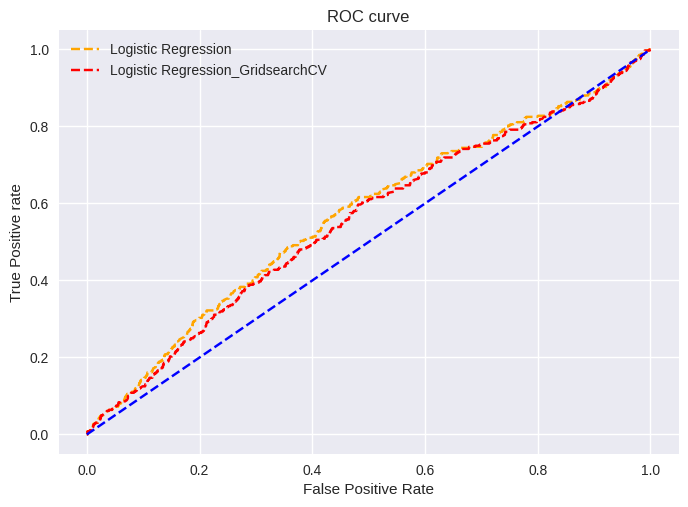

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Logistic Regression_GridsearchCV')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()